# Récursivité (partie 2)

Une approche à résoudre un problème en fonction des solutions d’instances plus petites du même problème.
Une fonction récursive est une fonction qui s'appelle elle-même au cours de son exécution.  
L’algorithme récursif est plus simple en écriture que les algorithmes itératifs surtout si le cas traité présente une structure récursive. 




L'exemple par execellence d'une fonction récursive est celui de la fonction factorielle d'un nombre entier qui présente naturellement une structure récursive :

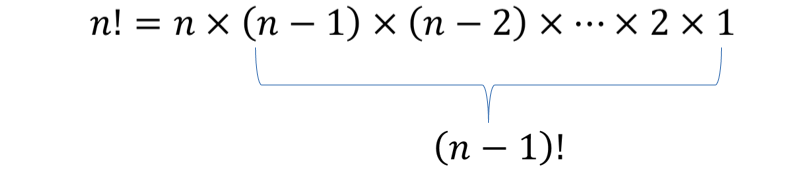

Toute analyse récursive est composée essentiellement de 2 étapes :

- Détermination de la condition d’arrêt ainsi que des cas particuliers.
- Détermination du traitement dans le cas général.


**Exemple 6 : recherche par dichotomie récursive - méthode 1**

Soit une liste . Le but est d'écrire une fonction récursive qui prend en paramètres la liste, l'élément à rechercher, et les deux paramètres debut et fin. Au premier appel de la fonction, debut est mis à 0 et fin est donné len(liste)-1. 




Tout d'abord, on suppose que l'élément existe dans la liste. Alors on procède comme suit :

- On calcule l'indice du milieu de la liste (m=(debut+fin)//2)). 
- Si element = liste[m], la fonction retourne m et la récursivité s'arrête.
- Si element est > liste[m], on appelle la même fonction mais en donnant à debut la valeur m+1. 
- Si element est < liste[m], on appelle la même fonction mais en donnant à fin la valeur m-1.


In [ ]:
def dichotomie_rec1_incomplete(liste,elt,debut,fin):
  m=(debut+fin)//2
  if liste[m]==elt:
    return m
  elif liste[m]<elt:
    return dichotomie_rec1_incomplete(liste,elt,m+1,fin)
  else:
    return dichotomie_rec1_incomplete(liste,elt,debut,m-1)    
    
liste=[1,2,5,6,8,9]
print(dichotomie_rec1_incomplete(liste,0,0,len(liste)-1))

Que se passe-t-il si l'élément ne s'y trouve pas. 

liste=[1,2,5,6,8,9] si l'élément à rechercher est 0 :

- Niveau 1 : m=(0+5)//2=2 liste[m]>0 alors appel avec debut =0 et fin=m-1=1
- Niveau 2 : m=(0+1)//2=0 liste[m]>0 alors appel avec debut=0 et fin=m-1=-1
- Niveau 3 : m=(0-1)//2=-1 liste[m]>0 alors appel avec debut=0 et fin=-1-1=-2
- Niveau 4 : m=(0-2)//=-1 liste[m]>0 alors appel avec debut=0 et fin-1-1=-2
- Pas de condition d'arrêt
 

liste=[1,2,5,6,8,9] si l'élément à rechercher est 10

- Niveau 1 : m=(0+5)//2=2 liste[m]<10 alors appel avec debut= 3 et fin=5
- Niveau 2 : m=(3+5)//2=4 liste[m]<10 alors appel avec debut = 5 et fin=5
- Niveau 3 : m=(5+5)//2=5 liste[m]<10 alors appel avec debut=6 et fin=5
- Niveau 4 : m=(6+5)//2=5 liste[m]<10 alors appel avec debut=6 et fin=5
- Niveau 5 : m=(6+5)//2=5 liste[m]<10 alors appel avec debut=6 et fin=5
- Pas de condition d'arrêt

Donc, pour remédier à ce problème, il suffit d'arrêter l'algorithme quand debut devient > à fin. Ce cas arrive quand l'élément est introuvable dans la liste. D'où la fonction de dichotomie récursive qui retourne l'indice de l'élément s'il se trouve dans liste et None sinon.

In [ ]:
def dichotomie_rec1_complete(liste,elt,debut,fin):
  
   if debut>fin:
     return None
   m=(debut+fin)//2
   if liste[m]==elt:
      return m
   elif liste[m]<elt:
      return dichotomie_rec1_complete(liste,elt,m+1,fin)
   else:
      return dichotomie_rec1_complete(liste,elt,debut,m-1)  
      
liste=[1,2,5,6,8,9]
print(dichotomie_rec1_complete(liste,0,0,len(liste)-1))        

**Exemple 6 : recherche par dichotomie récursive - méthode 2**

Une deuxième méthode de la dichotomie récursive consiste à scinder la liste en 2 et à rechercher dans la moitié pertinente sans utilser les indices debut et fin.

Tout d'abord, on suppose que l'élément existe dans la liste :

In [ ]:
def dichotomie_rec2_incomplete(liste,elt):
    n=len(liste)
    print(liste)
    m=n//2
    if liste[m]==elt:
        return m
    elif liste[m]<elt:
        return m+dichotomie_rec2_incomplete(liste[m:],elt)
    else:
        return dichotomie_rec2_incomplete(liste[:m],elt)
liste=[1,2,5,6,8,9]
print(dichotomie_rec2_incomplete(liste,0))      

Je cherche 9 dans la liste :

- Niveau 1 : n=6, m=3, liste[3]=6 < 9, appel avec liste=[6,8,9] à ajouter 3 au retour de cet appel
- Niveau 2 : n=3, m=1, liste[1]=8 < 9, appel avec liste=[8,9] à ajouter 1 au retour de cet appel
- Niveau 3 : n=2, m=1, liste[1]=9, retour 1

Le retour final 1+1+3=5

Que se passe-t-il si l'élément ne s'y trouve pas. 

liste=[1,2,5,6,8,9] si l'élément à rechercher est 0 :
- Niveau 1 : m=6//2=3 liste[m]>0 alors appel avec liste=[1,2,5]
- Niveau 2 : m=3//2=1 liste[m]>0 alors appel avec liste=[1]
- Niveau 3 : m=1//2=0 liste[m]>0 alors appel avec liste=[] donc erreur


liste=[1,2,5,6,8,9] si l'élément à rechercher est 10 :

- Niveau 1 : m=6//2=3 liste[m]<10 alors appel avec 3+dichotomie_rec2([6,8,9],10)
- Niveau 2 : m=3//2=1 liste[m]<10 alors appel avec 3+1+dichotomie_rec2([8,9],10)
- Niveau 3 : m=2/2=1  liste[m]<10 alors appel avec 1+3+1+dichotomie_rec2([9],10)
- Niveau 4 : m=1//2=0 liste[m]<10 alors appel avec 0+1+3+1+dichotomie_rec([9])
- Niveau 5 : m=1//2=0 liste[m]<10 alors appel avec 0+0+1+3+1+dichotomie_rec([9])
- Pas de condition d'arrêt

Pour remédier à ce problème, si la liste contient un seul élément, on retourne 0 si cet élément est équivalent à l'élément recherché. Sinon, on retourne None. D'autre part, si la liste est vide on retourne None et il faut faire attention de voir si le retour de la fonction est None avant de faire m+dichotomie_rec2(liste[m:],elt).

In [ ]:
def dichotomie_rec2_complete(liste,elt):
    n=len(liste)
    if n==1:
        if liste[0]==elt:
            return 0
        else:
            return None
    if n==0:
        return None
    m=n//2
    if liste[m]==elt:
        return m
    elif liste[m]<elt:
        r=dichotomie_rec2_complete(liste[m:],elt)
        if r!=None:
           return m+dichotomie_rec2_complete(liste[m:],elt)
    else:
        return dichotomie_rec2_complete(liste[:m],elt)

liste=[1,2,5,6,8,9]
print(dichotomie_rec2_complete(liste,9))    

**Exemple 7 : Fusion de 2 listes triées.**

Soient 2 listes triées : 
- liste1 = [1,5,9,11] 
- liste2 = [2,4,7,12,14,16] 
Il faut pouvoir fusionner ces 2 listes en une seule liste triée : 
- liste = [1, 2, 4, 5, 7, 9, 11, 12, 14, 16].


In [ ]:
def fusion(liste1,liste2):
   if len(liste1)==0:
      return liste2
   if len(liste2)==0:
      return liste1
   if liste1[0]<liste2[0]:
      return [liste1[0]]+fusion(liste1[1:],liste2)
   else:
      return [liste2[0]]+fusion(liste1,liste2[1:])
        
liste1 = [1,5,9,11]     
liste2=[2,4,7,12,14,16]
print(fusion(liste1,liste2))

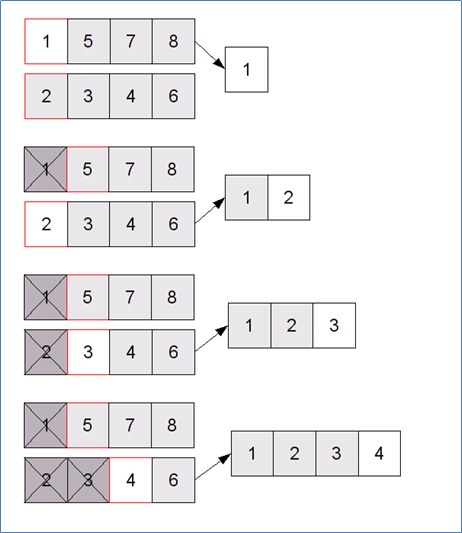

Exemple 9 : Ecrire une fonction récursive qui permet de calculer le maximum d'une liste:


In [ ]:
def maximum(liste):
    if len(liste)==1:
        return liste[0]
    m=maximum(liste[1:])
    if m<liste[0]:
          return liste[0]
    else:
          return m

#liste = [20,8,2,3,19]
import random
n=3000
liste=[random.random() for i in range(n)]
print(maximum(liste))

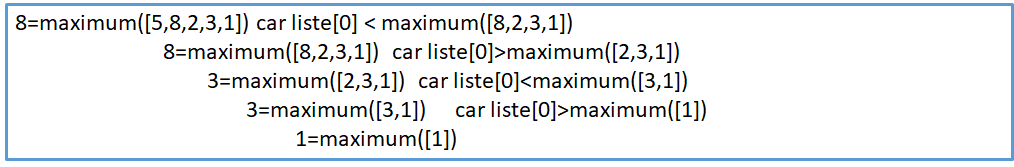

In [5]:
def maximum2(liste):
    if len(liste)==1:
        return liste[0]
    m=len(liste)//2
    M1=maximum2(liste[:m])
    M2=maximum2(liste[m:])
    if M1>M2:
        return M1
    else:
        return M2

import random
n=1000000
liste=[random.random() for i in range(n)]
print(maximum2(liste))    

0.9999977057924633


**Exemple 10 : Moyennant le module Turtle, dessiner la figure suivante en utilisant une fonction récursive.**

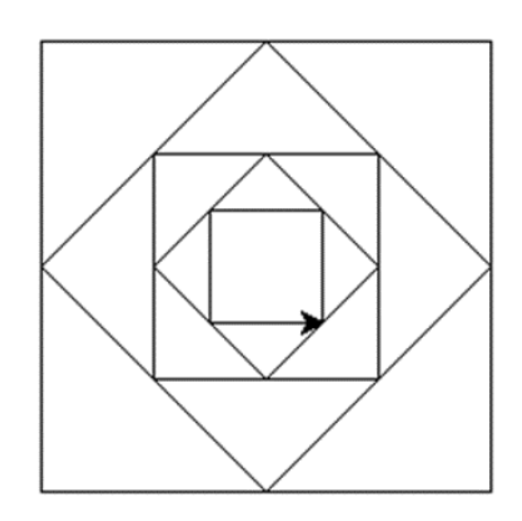

In [ ]:
from turtle import*

from math import *

def carre(cote):
     i=0
     while i<4:
        fd(cote)
        right(90)
        i+=1

def figure(cote,nb=4):
  if nb>0:
    carre(cote)
    new=cote/sqrt(2)
    fd(cote/2)
    right(45)
    figure(new,nb-1)

figure(200)   